In [93]:
import pandas as pd

In [94]:
df = pd.read_csv('data_2008.csv')
df.head()

,Id,Unidade (Instância),W,Z,V,T
0,1,Cachoeira do Sul,-0.161526,-0.239968,-0.331351,-0.238516
1,2,Camaquã,-0.290858,-0.280861,-0.249778,-0.255985
2,3,Campanha Central,-0.608565,-0.178725,-0.399571,-0.209626
3,4,Campanha Meridional,-0.403625,-0.198061,-0.330541,-0.231046
4,5,Campanha Ocidental,4.252155,0.064121,-0.190700,-0.088644


In [95]:
import numpy as np 
from matplotlib import pyplot as pl 
import seaborn as sb 

In [96]:
df = df.drop(['Unidade (Instância)','Id'], axis = 1)

df = df.query('W < 2 and Z < 2 and V < 2 and T < 2')

X = np.array(df)
X

array([[-0.16152611, -0.23996826, -0.33135129, -0.23851618],
       [-0.29085807, -0.28086077, -0.24977836, -0.25598471],
       [-0.6085653 , -0.17872503, -0.39957061, -0.2096259 ],
       [-0.40362484, -0.19806067, -0.33054065, -0.23104566],
       [-0.51769854, -0.33291287, -0.39487871, -0.28229389],
       [-0.41279888, -0.3573801 , -0.42107462, -0.30137838],
       [-0.01431334, -0.24530038, -0.39505175, -0.21796055],
       [-0.19072922, -0.18764308, -0.15275632, -0.1723256 ],
       [ 0.08977241, -0.29348272, -0.3867197 , -0.25394374],
       [-0.5181539 ,  0.03460901,  0.08232898, -0.00519986],
       [-0.14139503, -0.27984822,  0.01265064, -0.24856709],
       [-0.35323142, -0.36110268, -0.43486326, -0.30199802],
       [-0.40677894, -0.34203853, -0.43116006, -0.30282962],
       [ 0.36615614, -0.04749815, -0.21235634, -0.03302129],
       [-0.39031893, -0.15524956,  0.05916218, -0.18114721],
       [-0.49090893, -0.3642494 , -0.39690011, -0.3003004 ],
       [ 0.2480012 ,  0.

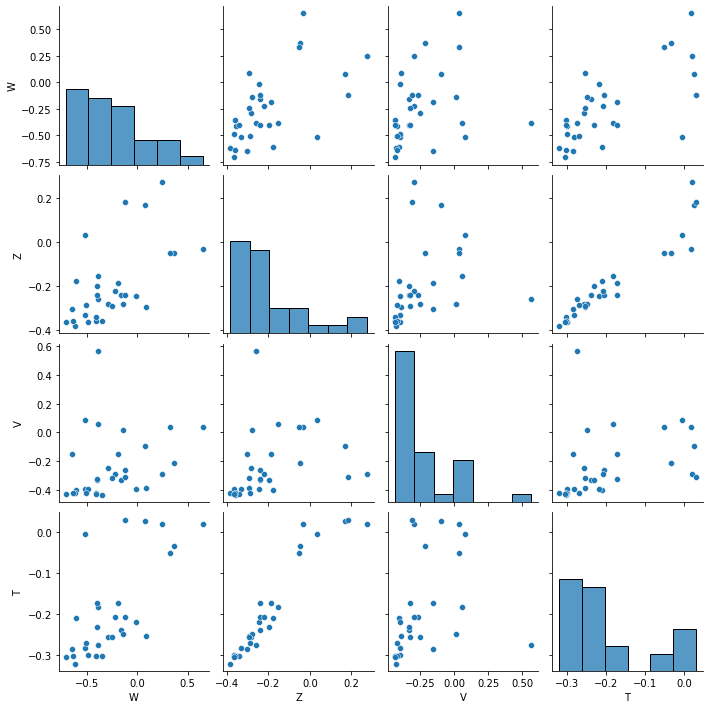

In [97]:
sb.pairplot(df)

In [98]:
from sklearn.cluster import KMeans

#### plot do atributo inertia_ que corresponde ao somatório dos erros quadráticos das instâncias de cada cluster para verificar o Elbow e encontrar o valor ideal do parâmetro k

1 6.116277943986536
2 3.218651394369653
3 2.1976774234804712
4 1.4053255312120316
5 1.077650412518192
6 0.9019105220250886
7 0.839646664052619
8 0.7246676228475285
9 0.6716388163181563
10 0.42915034848861816


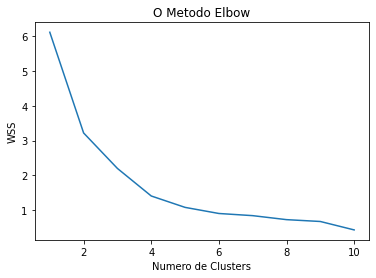

In [99]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
pl.plot(range(1, 11), wcss)
pl.title('O Metodo Elbow')
pl.xlabel('Numero de Clusters')
pl.ylabel('WSS') #within cluster sum of squares
pl.show()

#### n_clusters vai definir a quantidade de clusters, fit() executa o algoritmo e agrupar os dados

In [100]:
kmeans = KMeans(n_clusters=4,random_state=50)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=50)

#### cluster_centers_ verifica os centroides gerados 

In [101]:
kmeans.cluster_centers_

array([[-0.14186171, -0.20968963, -0.26847896, -0.20228522],
       [ 0.33332626,  0.0628083 , -0.10646293, -0.00324447],
       [-0.43257212, -0.12727114,  0.23594065, -0.15356248],
       [-0.51731394, -0.31323633, -0.38325693, -0.27555072]])

#### distância das instância em relação a cada cluster

In [102]:
distance = kmeans.fit_transform(X)
distance

array([[0.08104996, 0.66519175, 0.64436314, 0.36880747],
       [0.17463846, 0.76950078, 0.53859625, 0.26557447],
       [0.48580855, 1.03634139, 0.66380628, 0.17615991],
       [0.27080248, 0.84454352, 0.57684817, 0.17592712],
       [0.4228659 , 1.02073047, 0.68120472, 0.02382961],
       [0.35822383, 0.95975276, 0.71194082, 0.12234916],
       [0.1838562 , 0.58751234, 0.76887569, 0.51096052],
       [0.13100913, 0.60670549, 0.46213651, 0.43152891],
       [0.27807395, 0.57241222, 0.83561499, 0.6078017 ],
       [0.60264956, 0.87261669, 0.28131377, 0.64098121],
       [0.29342513, 0.64586765, 0.40859291, 0.54763191],
       [0.32439088, 0.92095735, 0.73005694, 0.18049082],
       [0.3525219 , 0.95227946, 0.71700374, 0.12683218],
       [0.56230618, 0.15920235, 0.92727069, 0.96910459],
       [0.41531944, 0.79390973, 0.1859561 , 0.49571588],
       [0.41451375, 1.01702405, 0.69396061, 0.06401751],
       [0.66091015, 0.29474059, 0.96592321, 1.01366953],
       [0.89210794, 0.3585153 ,

#### obter os labels para cada instância - cluster que a instância de dados foi atribuído.

In [103]:
kmeans.labels_

array([0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 3, 3, 1, 2, 3, 1, 1, 1, 3, 3, 1,
       0, 0, 3, 0, 2, 3, 3, 0, 3], dtype=int32)

In [104]:
prevs = kmeans.predict(X)
df["Groups"] = prevs

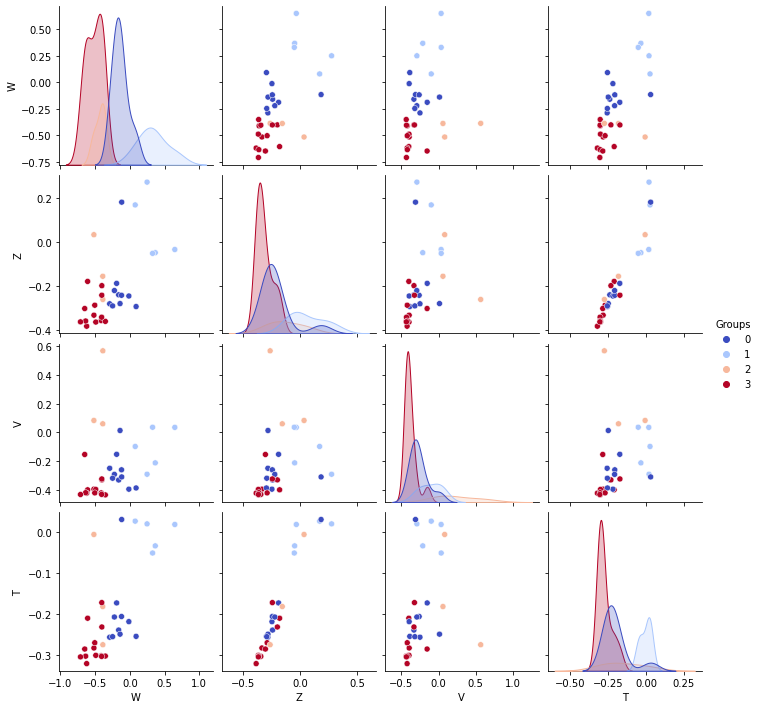

In [105]:
sb.pairplot(df,hue='Groups',palette='coolwarm')

#### verificação dos centroides e pontos

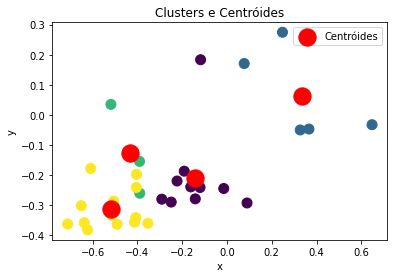

In [112]:
pl.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
pl.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centróides')
pl.title('Clusters e Centróides')
pl.xlabel('x')
pl.ylabel('y')
pl.legend()

pl.show()

#### predição ano seguinte

In [106]:
df_ny = pd.read_csv('data_2009.csv')
df_ny.head()

,Id,Unidade (Instância),W,Z,V,T
0,1,Cachoeira do Sul,-0.243774,-0.245708,-0.327173,-0.162088
1,2,Camaquã,-0.283129,-0.258810,-0.219548,-0.326683
2,3,Campanha Central,-0.182641,-0.213708,-0.394931,-0.616494
3,4,Campanha Meridional,-0.201881,-0.234595,-0.324903,-0.411445
4,5,Campanha Ocidental,0.065232,-0.085943,-0.169111,4.143481


In [107]:
df_ny = df_ny.drop(['Unidade (Instância)','Id'], axis = 1)

df_ny = df_ny.query('W < 2 and Z < 2 and V < 2 and T < 2')

X_ny = np.array(df_ny)
X_ny

array([[-2.43773518e-01, -2.45708215e-01, -3.27173349e-01,
        -1.62088380e-01],
       [-2.83128808e-01, -2.58809977e-01, -2.19548029e-01,
        -3.26683398e-01],
       [-1.82640803e-01, -2.13707910e-01, -3.94930958e-01,
        -6.16493713e-01],
       [-2.01881127e-01, -2.34594945e-01, -3.24903412e-01,
        -4.11444553e-01],
       [-3.35247377e-01, -2.85025549e-01, -3.92662843e-01,
        -5.28049310e-01],
       [-3.58970842e-01, -3.02751590e-01, -4.21162858e-01,
        -3.67657359e-01],
       [-2.47482598e-01, -2.21269414e-01, -3.80348007e-01,
         1.41598654e-03],
       [-1.83693349e-01, -1.70218815e-01, -1.61952513e-01,
        -1.82249216e-01],
       [-2.92997518e-01, -2.53174103e-01, -3.83513651e-01,
         1.22142964e-01],
       [ 3.50329144e-02,  1.41380898e-04,  1.15007525e-01,
        -5.13470951e-01],
       [-2.79970275e-01, -2.49046867e-01, -3.92252709e-02,
        -1.75488534e-01],
       [-3.63465640e-01, -3.03683448e-01, -4.42643703e-01,
      

In [108]:
kmeans.predict(X_ny)


array([0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 2, 3, 1, 1, 1, 3, 3, 1,
       1, 0, 3, 0, 2, 3, 3, 0, 0], dtype=int32)